In [20]:
###그림 8.21 라이브러리 임포트 및 학습 데이터 로드##################################################################

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from time import time
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
from keras.utils import to_categorical

df = pd.read_csv('D:/training_data/CarDrivingIncidentInfo.csv')

In [21]:
###그림 8.22 학습 데이터 전처리##################################################################

X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

D:\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [22]:
###그림 8.23 DNN 모델 구성 및 요약 정보 출력##################################################################

model = Sequential([
    Dense(10, input_dim=10, activation='relu'),
    Dense(20, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 20)                220       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 33        
Total params: 573
Trainable params: 573
Non-trainable params: 0
_________________________________________________________________


In [23]:
###그림 8.25 DNN 모델 학습##################################################################

tensorboard = keras.callbacks.TensorBoard(log_dir='D:/graph', histogram_freq=0, write_graph=True, write_images=True)

hist  = model.fit(X_train, Y_train, batch_size=2000, epochs=50, callbacks=[tensorboard], validation_data=(X_test, Y_test))

Train on 160000 samples, validate on 40000 samples
Epoch 1/50
160000/160000 [==============================] - 1s 4us/step - loss: 1.0135 - acc: 0.4305 - val_loss: 0.8767 - val_acc: 0.5426
Epoch 2/50
160000/160000 [==============================] - 0s 2us/step - loss: 0.7448 - acc: 0.6342 - val_loss: 0.5157 - val_acc: 0.7867
Epoch 3/50
160000/160000 [==============================] - 0s 2us/step - loss: 0.4277 - acc: 0.8246 - val_loss: 0.2552 - val_acc: 0.9234
Epoch 4/50
160000/160000 [==============================] - 0s 2us/step - loss: 0.2529 - acc: 0.9045 - val_loss: 0.1428 - val_acc: 0.9607
Epoch 5/50
160000/160000 [==============================] - 0s 2us/step - loss: 0.1666 - acc: 0.9427 - val_loss: 0.1016 - val_acc: 0.9703
Epoch 6/50
160000/160000 [==============================] - 0s 2us/step - loss: 0.1251 - acc: 0.9580 - val_loss: 0.0782 - val_acc: 0.9780
Epoch 7/50
160000/160000 [==============================] - 0s 2us/step - loss: 0.1009 - acc: 0.9662 - val_loss: 0.0628 -

In [24]:
###그림 8.26 DNN 모델을 학습한 결과##################################################################

score = model.evaluate(X_test, Y_test, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'acc']
[0.00032860907282866947, 0.99985]


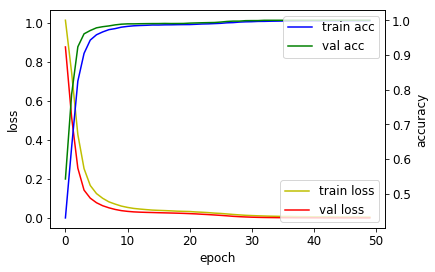

In [25]:
###그림 8.27 DNN 모델의 학습 결과 시각화##################################################################

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')

loss_ax.set_ylabel('loss')
loss_ax.legend(loc='lower right')

acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

<Figure size 432x288 with 0 Axes>

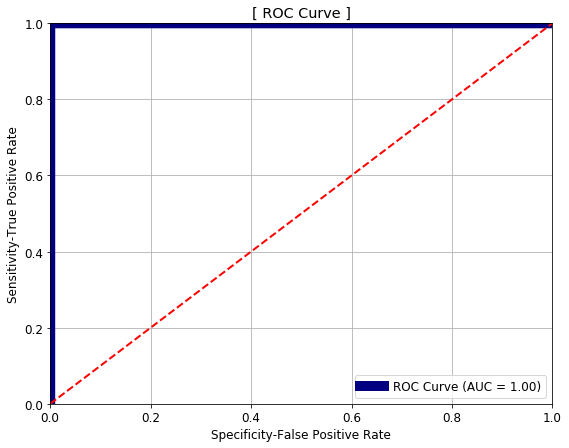

In [26]:
###그림 8.28 DNN 모델 예측 결과 평가 – ROC 커브##################################################################

y_predict_result = model.predict(X_test)

fpr, tpr, thresholds = roc_curve (Y_test.ravel(), y_predict_result.ravel())
roc_auc = auc(fpr, tpr)

plt.clf()
plt.figure(figsize = (9, 7))
plt.plot(fpr, tpr, color='navy', lw=10, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('[ ROC Curve ]')
plt.xlabel('Specificity-False Positive Rate')
plt.ylabel('Sensitivity-True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [27]:
###그림 8.29 DNN 모델 저장##################################################################

from keras.models import load_model

model.save('D://models/smartcar_dnn_model.h5')pip install flask